WeatherPy

In [1]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [2]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [3]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

lats = []
longs = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

num_samples = 5

for x in range(num_samples):
    lat = random.uniform(-90,90)
    lats.append(lat)
    long = random.uniform(-180,180)
    longs.append(long)
    city = citipy.nearest_city(lat, long)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    cities.append(f'{f_city}, {f_country}')
    
    q_url = f'{url}lat={lat}&lon={long}&units={units}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    temp = response["main"]["temp"]
    humid = response["main"]["humidity"]
    cloud = response["clouds"]["all"]
    wind = response["wind"]["speed"]
    
    temperature.append(temp)
    humidity.append(humid)
    cloudiness.append(cloud)
    wind_speed.append(wind)
    
df = pd.DataFrame({
    "Latitude": lats,
    "Longitude": longs,
    "City": cities,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed
0,0.924301,-33.989523,"Touros, BR",80.46,81,100,7.43
1,-18.499855,-151.703681,"Tevaitoa, PF",81.28,68,4,4.52
2,3.321691,22.698733,"Ouango, CF",69.71,99,100,2.75
3,-49.235988,82.161359,"Busselton, AU",43.48,96,100,21.54
4,-0.968984,-57.865464,"Urucara, BR",70.02,98,67,0.72


In [4]:
lats = df["Latitude"]
longs = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

(-30, 120)

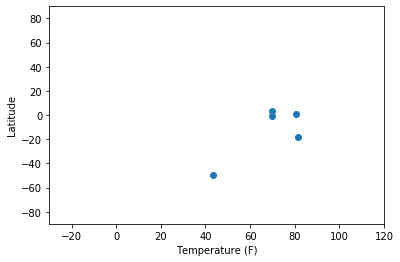

In [5]:
# Temp vs. Latitude
plt.scatter(temps, lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(-30, 120)

(0, 100)

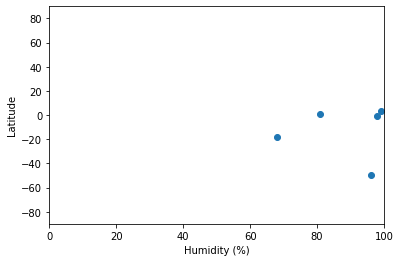

In [6]:
# Humidity vs. Latitude
plt.scatter(humids, lats)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(0, 100)

(0, 110)

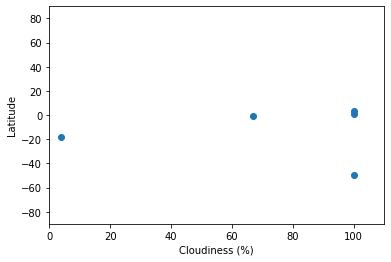

In [7]:
# Cloudiness vs. Latitude
plt.scatter(clouds, lats)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(0, 110)

(0, 60)

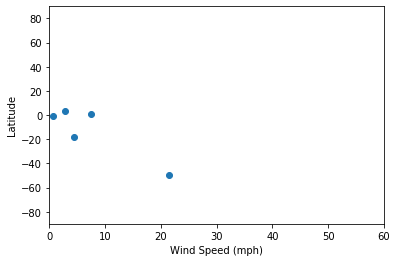

In [8]:
# Wind speed vs. Latitude
plt.scatter(winds, lats)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(0, 60)

In [32]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df.head()
df["Hemisphere"] = hemisphere
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,0.924301,-33.989523,"Touros, BR",80.46,81,100,7.43,Northern
1,-18.499855,-151.703681,"Tevaitoa, PF",81.28,68,4,4.52,Southern
2,3.321691,22.698733,"Ouango, CF",69.71,99,100,2.75,Northern
3,-49.235988,82.161359,"Busselton, AU",43.48,96,100,21.54,Southern
4,-0.968984,-57.865464,"Urucara, BR",70.02,98,67,0.72,Southern


In [36]:
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
n_hem

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,0.924301,-33.989523,"Touros, BR",80.46,81,100,7.43,Northern
2,3.321691,22.698733,"Ouango, CF",69.71,99,100,2.75,Northern


In [37]:
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]
s_hem

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
1,-18.499855,-151.703681,"Tevaitoa, PF",81.28,68,4,4.52,Southern
3,-49.235988,82.161359,"Busselton, AU",43.48,96,100,21.54,Southern
4,-0.968984,-57.865464,"Urucara, BR",70.02,98,67,0.72,Southern
